In [ ]:
!pip install earthpy

In [ ]:
pip install rasterio

In [ ]:
!pip install earthpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import rasterio
import rasterio.features
import rasterio.warp
import earthpy
from rasterio.transform import Affine
from rasterio.plot import show
from rasterio.plot import show_hist
import numpy as np
from matplotlib import pyplot as plt
import earthpy.plot as ep
import warnings

warnings.filterwarnings('ignore')

### Zadanie nr 1

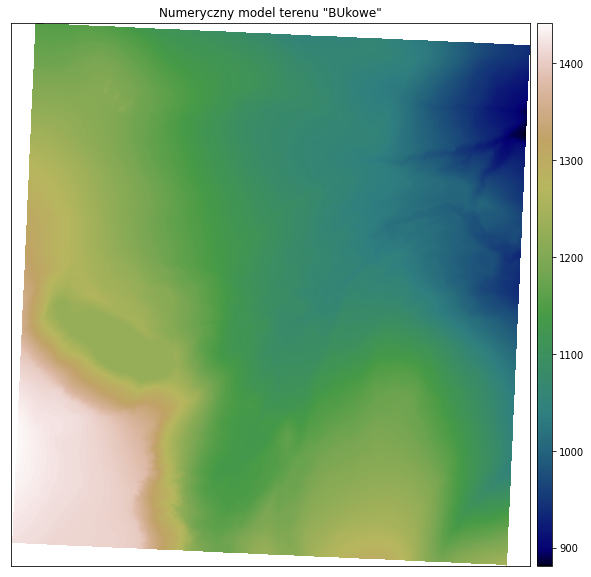

In [ ]:
dtm = "/content/4112_429415_M-33-44-C-b-4-3.asc"
with rasterio.open(dtm) as src:
    elevation = src.read(1)
    elevation[elevation <= -9999] = np.nan

ep.plot_bands(
    elevation,
    cmap="gist_earth",
    title="Fragment Karkonoskiego Parku Narodowego",
    figsize=(20, 10),
)
plt.show()

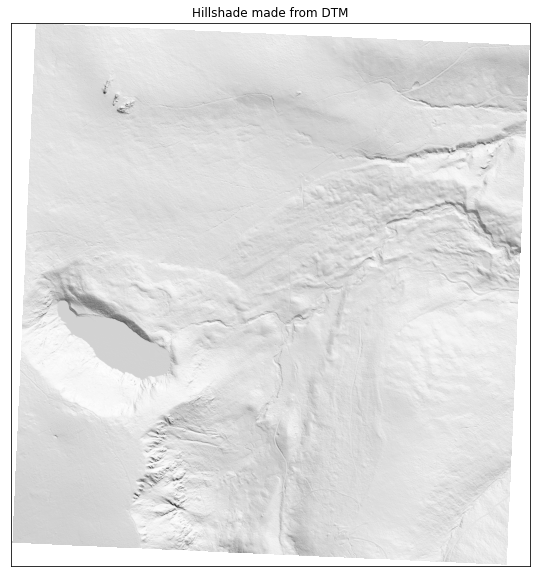

In [ ]:
# Cieniowanie
hillshade = es.hillshade(elevation)

ep.plot_bands(
    hillshade,
    cbar=False,
    title="Hillshade made from DTM",
    figsize=(20, 10),
)
plt.show()

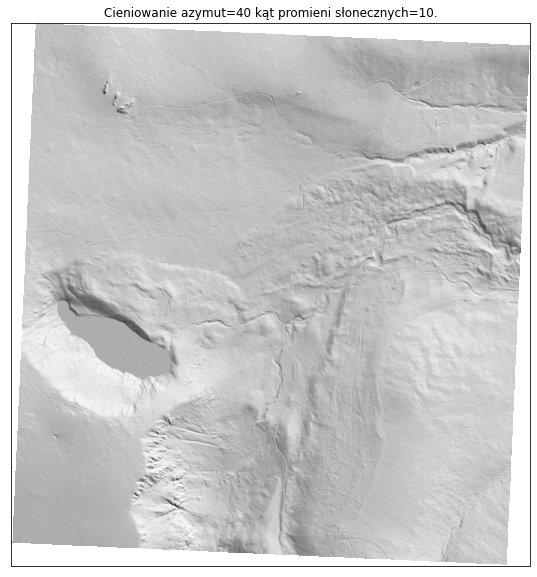

In [ ]:
# Cieniowanie z wykorzystaniem konta padania promieni słonecznych
azimuth=40
altitude=10
hillshade_azimuth = es.hillshade(elevation, azimuth=azimuth,altitude=altitude)

# Plot the hillshade layer with the modified azimuth
ep.plot_bands(
    hillshade_azimuth, #dodana funkcja cieniowania pod kątem
    cbar=False,
    title="Cieniowanie azymut="+str(azimuth)+" kąt promieni słonecznych="+str(altitude)+".",
    figsize=(20, 10),
)
plt.show()

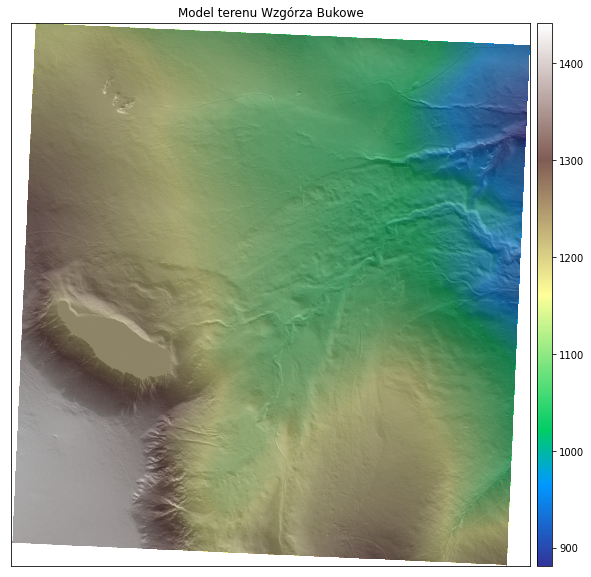

In [ ]:
# Plot the DEM and hillshade at the same time
# sphinx_gallery_thumbnail_number = 5
fig, ax = plt.subplots(figsize=(20, 10))
ep.plot_bands(
    elevation,
    ax=ax,
    cmap="terrain",
    title="Model terenu Wzgórza Bukowe",
)
ax.imshow(hillshade, cmap="Greys", alpha=0.5) #przeźroczystość
plt.show()

### Zadanie nr 2

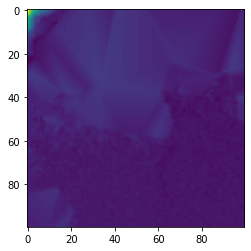

In [ ]:
image = rasterio.open("/content/drive/MyDrive/geo/szmaragdowe_geotif.tif")
raster = image.read(1)

center_x = int(raster.shape[0] / 2)
center_y = int(raster.shape[1] / 2)
cropped = raster[center_x-50:center_x+50, center_y-50:center_y+50]
plt.imshow(cropped)
plt.show()

file = gdal.Open("/content/drive/MyDrive/geo/szmaragdowe_geotif.tif")
file1 = driver.Create("/content/drive/MyDrive/geo/cropped.tif", raster.shape[0] , raster.shape[1] , 1)
file1.GetRasterBand(1).WriteArray(cropped)
proj = file.GetProjection()
georef = file.GetGeoTransform()
file1.SetProjection(proj)
file1.SetGeoTransform(georef)
file1.FlushCache()
src = "/content/drive/MyDrive/geo/cropped.tif"
dst = "/content/drive/MyDrive/geo/cropped_wgs84.tif"
translateoptions = gdal.TranslateOptions(gdal.ParseCommandLine("-co TFW=YES -a_srs ELSG:4326 -of Gtiff -co COMPRESS=LZW"))
driver = gdal.GetDriverByName('GTiff')
gdal.Translate(dst, src, options=translateoptions)

### Zadanie nr 3


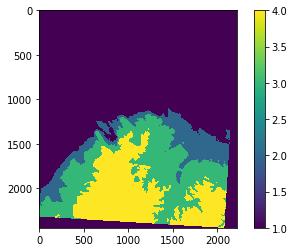

2220


In [ ]:
from osgeo import gdal

driver = gdal.GetDriverByName('GTiff')
file = gdal.Open("/content/drive/MyDrive/geo/bukowe.tif")
band = file.GetRasterBand(1)
array = band.ReadAsArray()

# reklasyfikacja
array[np.where( array <= 20 )] = 1
array[np.where((20 < array) & (array <= 40)) ] = 2
array[np.where((40 < array) & (array <= 70)) ] = 3
array[np.where( array > 70 )] = 4

# zapis pliku
file2 = driver.Create("/content/drive/MyDrive/geo/bukowe_reclass.tif", file.RasterXSize , file.RasterYSize , 1)
file2.GetRasterBand(1).WriteArray(array)

# układ współrzędnych pobierany z pliku źródłowego
proj = file.GetProjection()
georef = file.GetGeoTransform()
file2.SetProjection(proj)
file2.SetGeoTransform(georef)
file2.FlushCache()
plt.imshow(array, interpolation='nearest', vmin=1)
plt.colorbar()
plt.show()

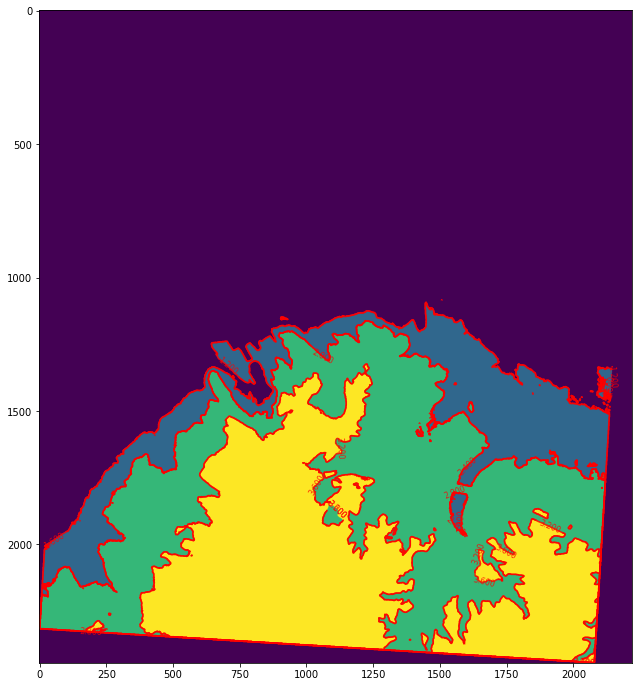

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 12))
show(array, ax=ax)
show(np.flipud(array), interpolation='nearest',  contour=True, ax=ax)
plt.show()

In [ ]:
area_per_pixel=file.GetGeoTransform()
for x in np.unique(array):
    tot_num_pixels = np.sum(array == x)
    area = tot_num_pixels * area_per_pixel[1]
    print (x, area/10000, 'ha')

1.0 666.6182269369369 ha
2.0 82.03471954954955 ha
3.0 173.0006271171171 ha
4.0 163.23802639639638 ha
